In [2]:
import pandas as pd

# Загрузка данных
train_events = pd.read_csv('train/train_events.csv')
video_info = pd.read_csv('train/video_info.csv')
targets = pd.read_csv('train/train_targets.csv')

# Объединение датасетов
merged_data = pd.merge(train_events, video_info, on='rutube_video_id')

In [8]:
merged_data

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 16:33:40+03:00,Irkutsk Oblast,tablet,mobile app,Android,Rutube,830,video_133074,10050175,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
2,2024-06-01 01:19:06+03:00,St.-Petersburg,tablet,mobile app,Android,Rutube,2450,video_133074,10034659,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
3,2024-06-01 21:18:14+03:00,Irkutsk Oblast,smartphone,mobile app,Android,Rutube,2411,video_133074,10337828,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
4,2024-06-01 19:01:56+03:00,Tver Oblast,tablet,mobile app,Android,Rutube,2325,video_133074,10069705,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 11:49:29+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,296,video_349050,10080921,STAND UP: Сколько у тебя трусов?,Телепередачи,376360,1006760
1759612,2024-06-30 18:32:06+03:00,Sverdlovsk Oblast,desktop,browser,Windows,Microsoft Edge,173,video_122192,10846113,Dreams Beach Resort Sharm El Sheikh 5* 2021,Разное,1418252,1101013
1759613,2024-06-30 11:15:02+03:00,Samara Oblast,smartphone,mobile app,Android,Rutube,7141,video_16215,10759341,"Левша , четкий фильм ,",Разное,7218829,1113942
1759614,2024-06-30 16:09:27+03:00,St.-Petersburg,smartphone,mobile app,NaN,Rutube,90,video_29328,10013064,Монсики – 78 серия — Храбрая песня — Союзмульт...,Мультфильмы,392960,1000005


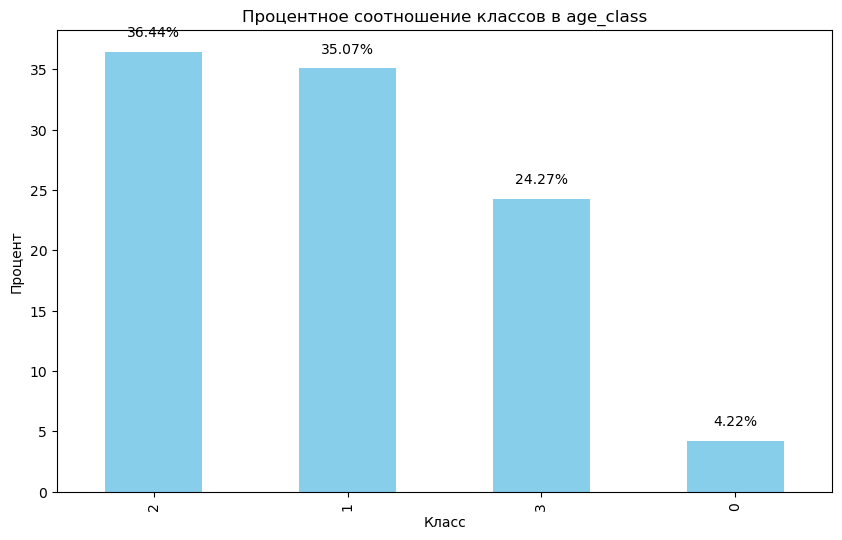

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Предположим, что targets - это DataFrame, а 'age_class' - это столбец в этом DataFrame
# Если targets - это Series, то можно использовать его напрямую

# Подсчитываем количество каждого класса
class_counts = targets['age_class'].value_counts()

# Вычисляем проценты
class_percentages = class_counts / class_counts.sum() * 100

# Строим график
plt.figure(figsize=(10, 6))
class_percentages.plot(kind='bar', color='skyblue')

# Добавляем подписи
plt.title('Процентное соотношение классов в age_class')
plt.xlabel('Класс')
plt.ylabel('Процент')

# Показываем значения на столбцах
for i, v in enumerate(class_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [7]:
class_counts

age_class
2    65600
1    63131
3    43690
0     7591
Name: count, dtype: int64

In [4]:
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])
merged_data['hour_of_day'] = merged_data['event_timestamp'].dt.hour
merged_data['day_of_week'] = merged_data['event_timestamp'].dt.day_name()
merged_data['is_weekend'] = merged_data['event_timestamp'].dt.dayofweek >= 5
merged_data['watchtime_ratio'] = merged_data['total_watchtime'] / merged_data['duration']

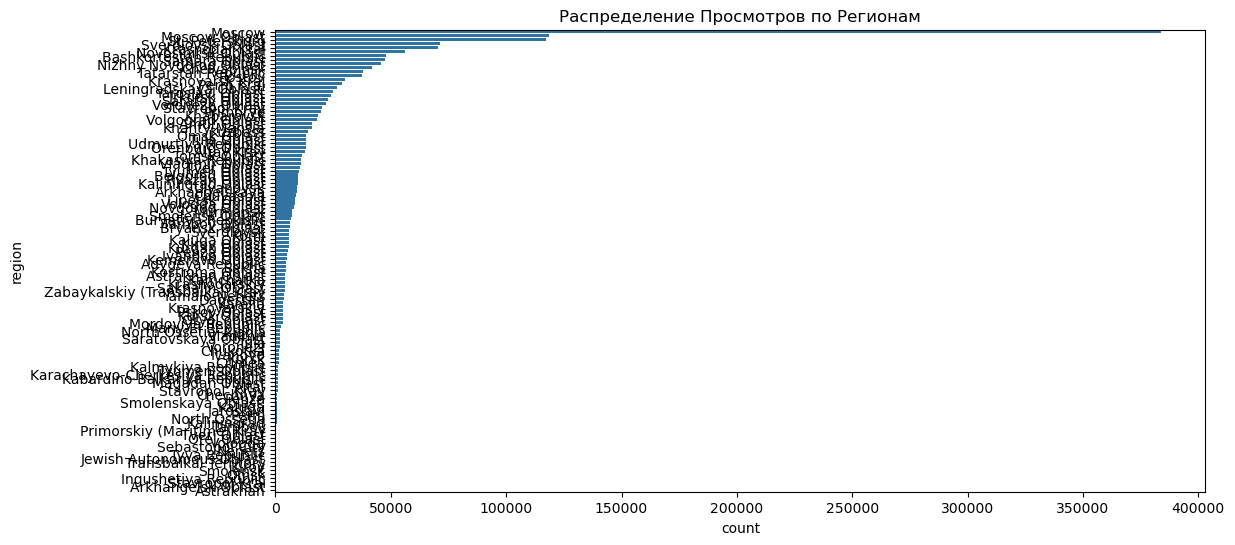

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, y='region', order=merged_data['region'].value_counts().index)
plt.title('Распределение Просмотров по Регионам')
plt.show()

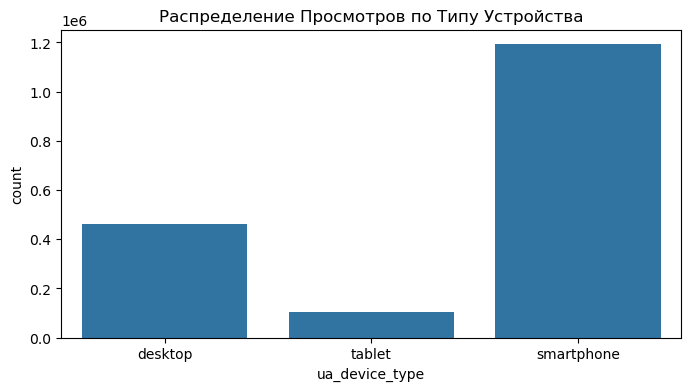

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_data, x='ua_device_type')
plt.title('Распределение Просмотров по Типу Устройства')
plt.show()

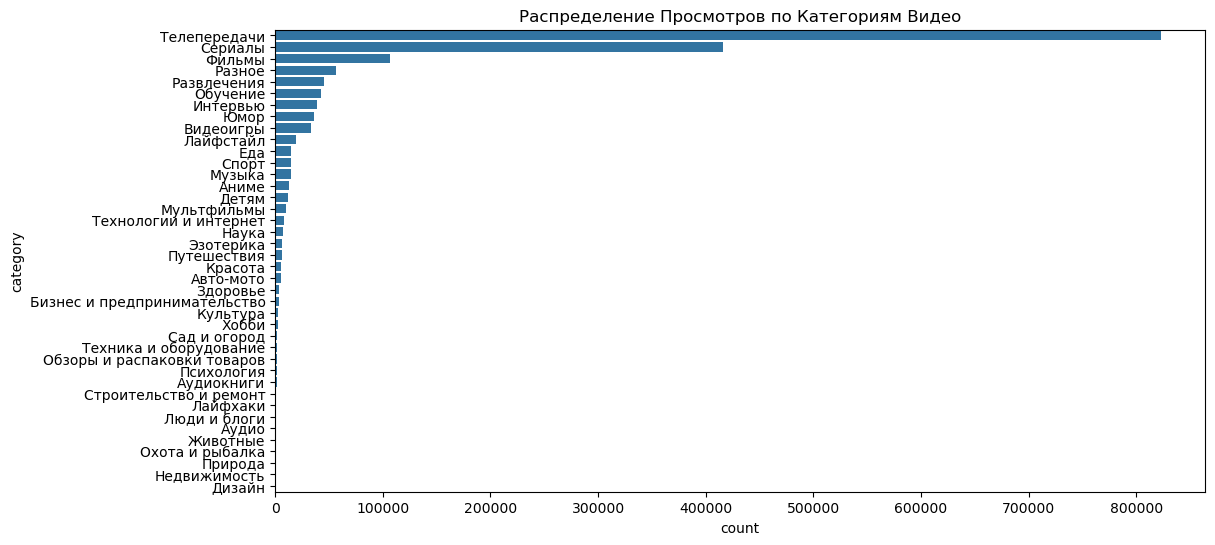

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, y='category', order=merged_data['category'].value_counts().index)
plt.title('Распределение Просмотров по Категориям Видео')
plt.show()

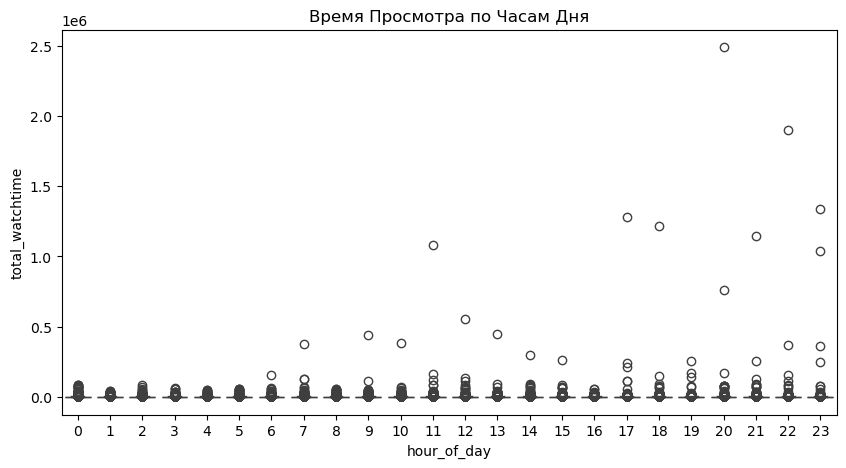

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_data, x='hour_of_day', y='total_watchtime')
plt.title('Время Просмотра по Часам Дня')
plt.show()

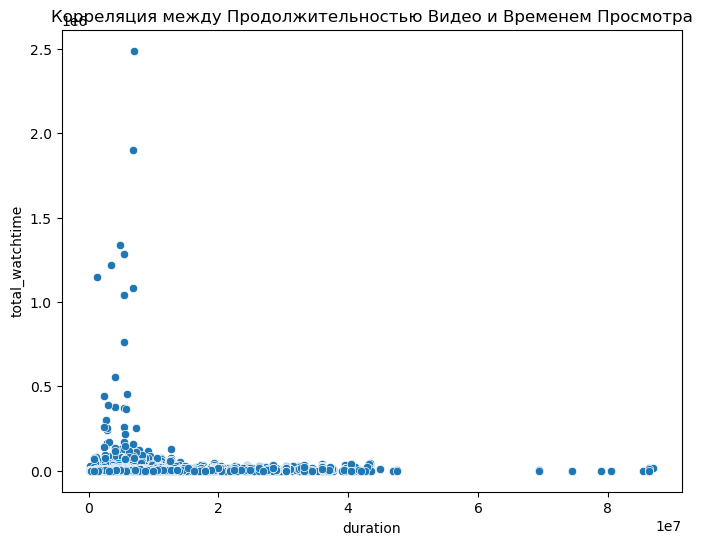

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='duration', y='total_watchtime')
plt.title('Корреляция между Продолжительностью Видео и Временем Просмотра')
plt.show()

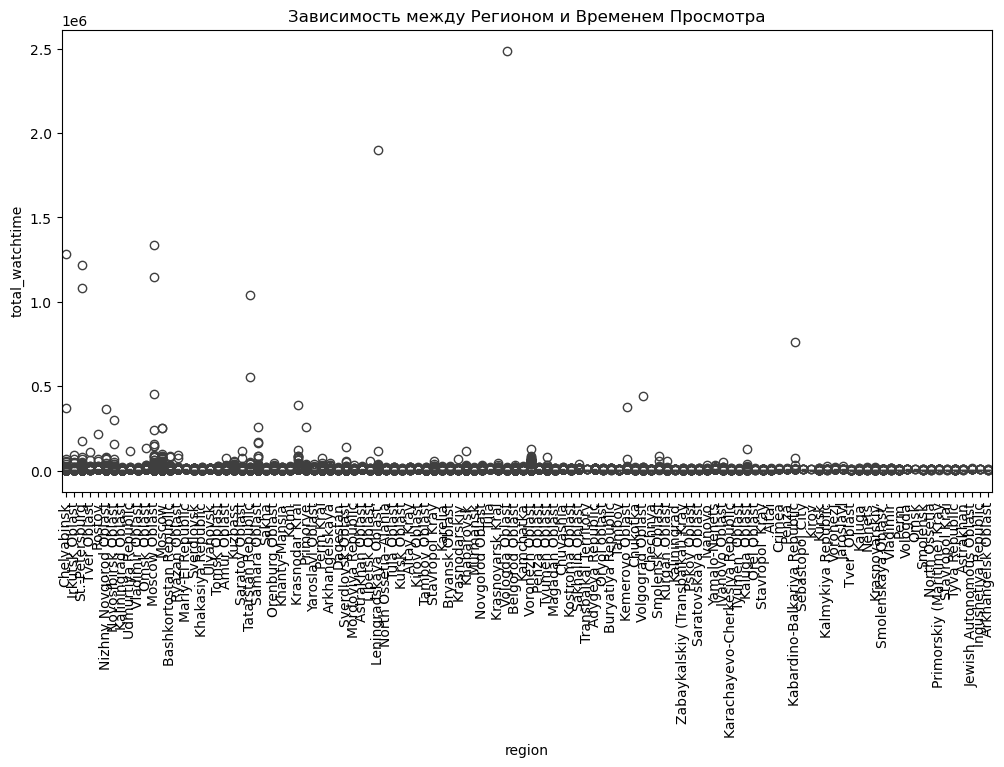

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='region', y='total_watchtime')
plt.title('Зависимость между Регионом и Временем Просмотра')
plt.xticks(rotation=90)
plt.show()

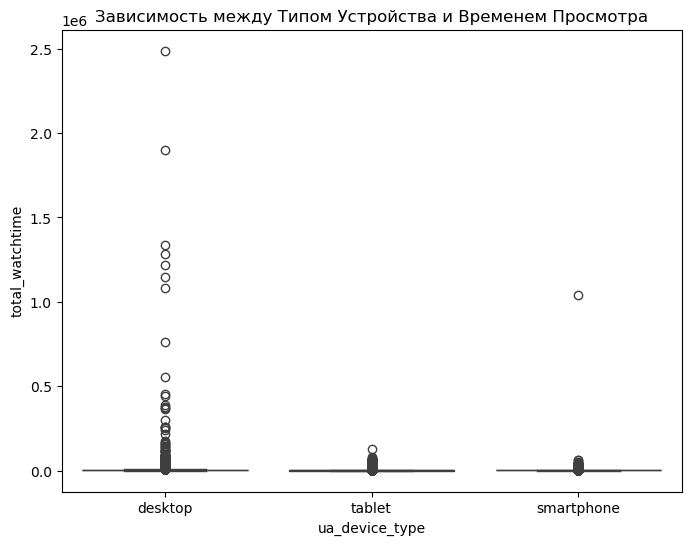

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='ua_device_type', y='total_watchtime')
plt.title('Зависимость между Типом Устройства и Временем Просмотра')
plt.show()

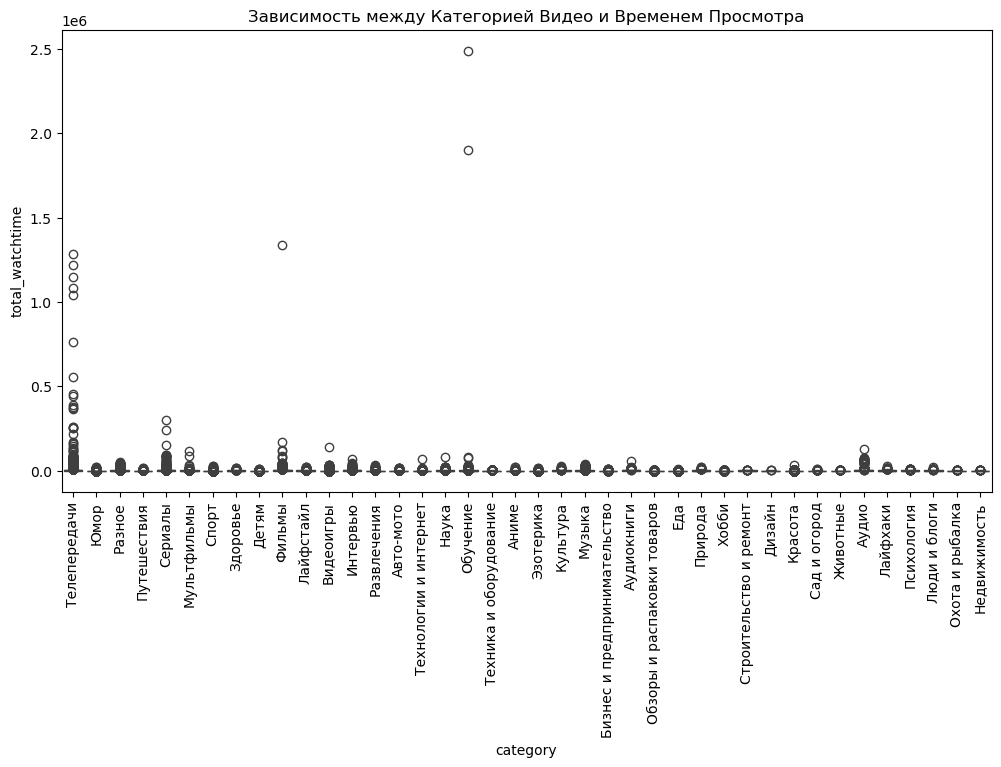

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='category', y='total_watchtime')
plt.title('Зависимость между Категорией Видео и Временем Просмотра')
plt.xticks(rotation=90)
plt.show()

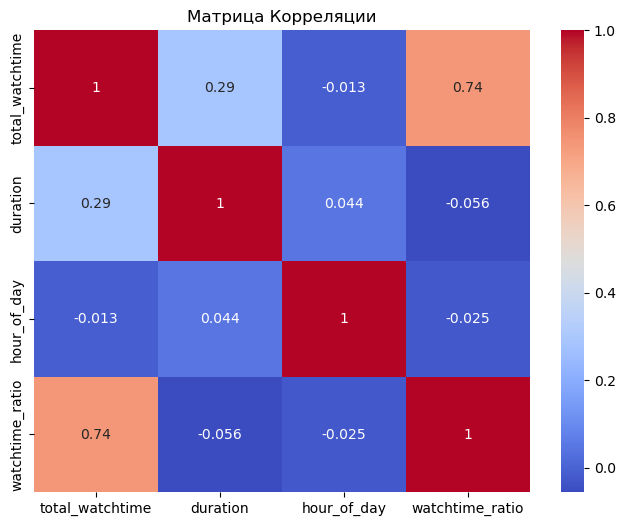

In [14]:
numeric_features = ['total_watchtime', 'duration', 'hour_of_day', 'watchtime_ratio']
corr_matrix = merged_data[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица Корреляции')
plt.show()

<Figure size 1200x600 with 0 Axes>

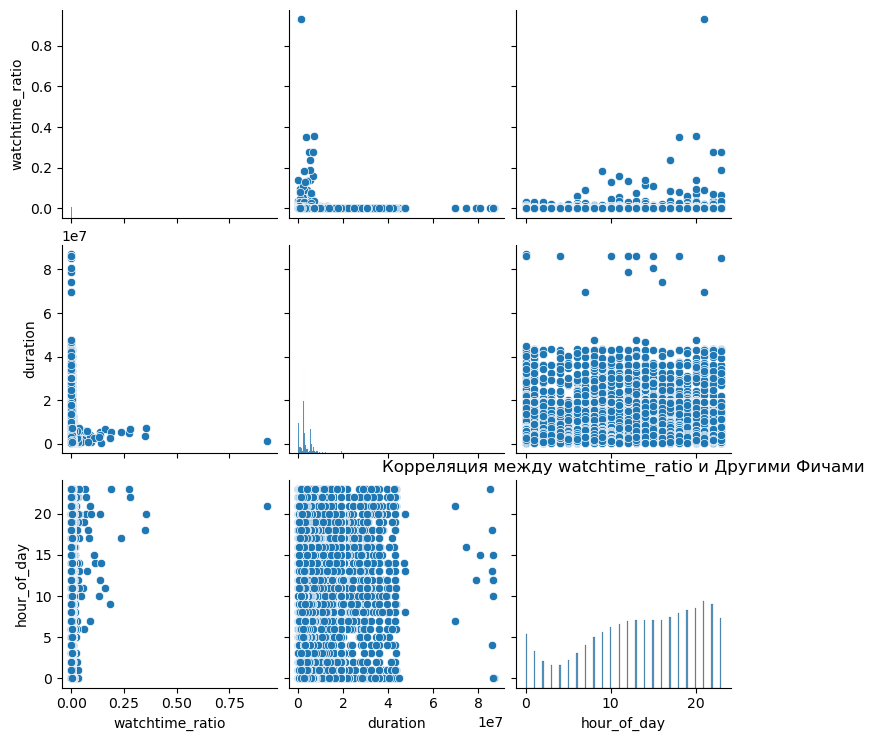

In [15]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=merged_data, vars=['watchtime_ratio', 'duration', 'hour_of_day'])
plt.title('Корреляция между watchtime_ratio и Другими Фичами')
plt.show()